In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.model_selection import train_test_split



In [24]:
#step 1: Generate Toy(Dummy) Datasset
X,y= make_blobs(n_samples=2000, n_features=2, cluster_std=3,centers=2, random_state=42)
print(X.shape, y.shape)

(2000, 2) (2000,)


In [22]:
#step-2 visualize dataSet
sns.set()
def visualise(X,y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")
    plt.show()

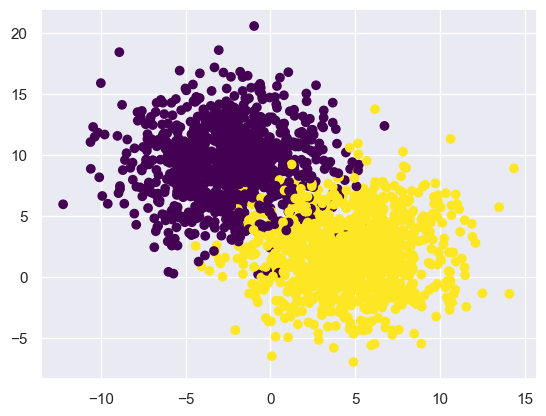

In [25]:
visualise(X,y)

In [26]:
X.mean()

3.335296810117377

In [29]:
#step 3: to normalize data:

def normalize(X):
    u=X.mean(axis=0)
    std=X.std(axis=0)
    
    return (X-u)/std

In [30]:
X=normalize(X)

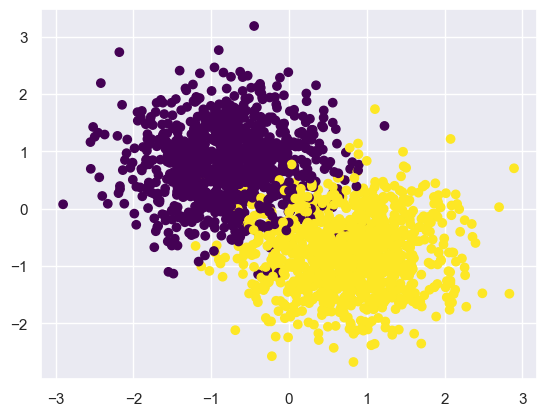

In [31]:
visualise(X,y)

In [37]:
XT, Xt,yT,yt= train_test_split(X,y, test_size=0.25, shuffle= False, random_state=0);

In [42]:
print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


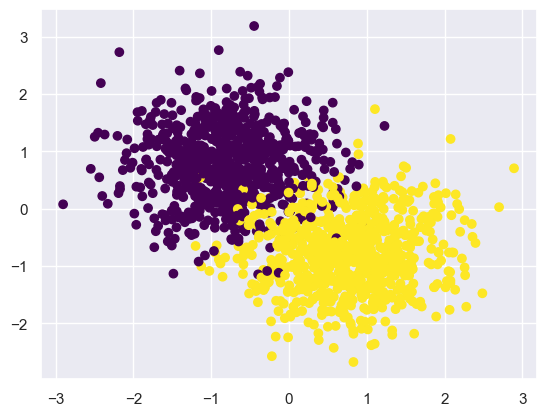

In [44]:
visualise(XT,yT)

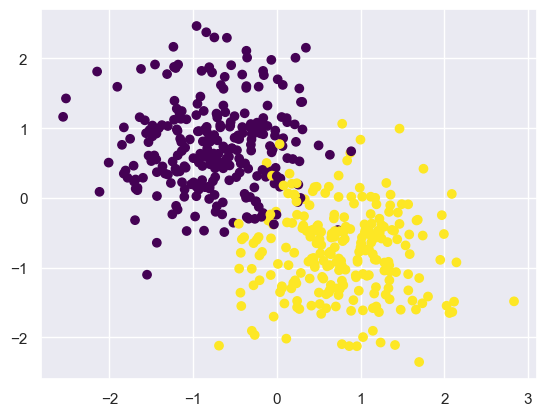

In [45]:
visualise(Xt, yt)

In [49]:
#Moddel
def sigmoid(z):
    return 1/(1+ np.exp(-z))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

#Binary cross entropy
def error(y,yp):
    loss = -np.mean(y*np.log(yp) + (1-y)*np.log(1-yp))
    return loss

def gradient(X, y, yp):
    m=X.shape[0]
    grad= -1/m *np.dot(X.T, (y-yp))
    return grad
def train(X,y, max_iters=100, learn_rate=0.1):
    